In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
fulldata = pd.read_csv(r'../movie_data2.csv')
fulldata.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi,roi_category,movie_year,tconst,...,Drama,Family,Adventure,Music,Western,Musical,War,History,Mystery,Horror
0,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000,high,The Gallows (2015),tt2309260,...,0,0,0,0,0,0,0,0,1,1
1,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,10175.949000,high,The Devil Inside (2012),tt1560985,...,0,0,0,0,0,0,0,0,0,1
2,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,5917.067733,high,Paranormal Activity 2 (2010),tt1536044,...,0,0,0,0,0,0,0,0,0,1
3,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,5107.359020,high,Get Out (2017),tt5052448,...,0,0,0,0,0,0,0,0,1,1
4,64,"Oct 21, 2016",Moonlight,1500000,27854931,65245512,4349.700800,high,Moonlight (2016),tt4975722,...,1,0,0,0,0,0,0,0,0,0


# Data Check

In [7]:
genreList = []
for el in fulldata['genres'].map(lambda x: str(x).split(",")):
    for el2 in el:
        genreList.append(el2)
genreCols = list(set(genreList))
genreCols

['Horror',
 'Animation',
 'Drama',
 'Western',
 'Romance',
 'Musical',
 'Adventure',
 'Comedy',
 'Reality-TV',
 'Music',
 'Sport',
 'Action',
 'Sci-Fi',
 'Biography',
 'Thriller',
 'Documentary',
 'Family',
 'War',
 'History',
 'Mystery',
 'Fantasy',
 'Crime']

In [99]:
genreCols_df = fulldata[[el for el in genreCols]]

In [101]:
check_df = pd.concat([fulldata['genres'],genreCols_df], axis=1)
check_df.head()

,genres,Horror,Animation,Drama,Western,Romance,Musical,Adventure,Comedy,Reality-TV,...,Sci-Fi,Biography,Thriller,Documentary,Family,War,History,Mystery,Fantasy,Crime
0,"Horror,Mystery,Thriller",1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,Horror,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Horror,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Horror,Mystery,Thriller",1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,Drama,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Bar Plot 1

In [10]:
fulldata[[el for el in genreCols]].head()

,Horror,Animation,Drama,Western,Romance,Musical,Adventure,Comedy,Reality-TV,Music,...,Sci-Fi,Biography,Thriller,Documentary,Family,War,History,Mystery,Fantasy,Crime
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
piv0 = pd.DataFrame((pd.pivot_table(fulldata, index=['roi_category'], values =fulldata[[el for el in genreCols]], aggfunc='sum')).stack())
piv0.columns = ['genreCount']
piv0

genreCount
roi_category                         
high          Action               60
              Adventure            58
              Animation            23
              Biography            31
              Comedy              105
              Crime                27
              Documentary           8
              Drama               151
              Family               13
              Fantasy              22
              History               6
              Horror               59
              Music                14
              Musical               4
              Mystery              48
              Reality-TV            0
              Romance              48
              Sci-Fi               39
              Sport                 4
              Thriller             67
              War                   1
              Western               1
low           Action               72
              Adventure            22
              Animation             6
              Biography            25
              Comedy               81
              Crime                46
              Documentary          18
              Drama               165
...                               ...
somewhat high Mystery              19
              Reality-TV            0
              Romance              36
              Sci-Fi               29
              Sport                 4
              Thriller             48
              War                   2
              Western               1
somewhat low  Action              105
              Adventure            68
              Animation            12
              Biography            31
              Comedy               88
              Crime                62
              Documentary           8
              Drama               169
              Family               21
              Fantasy              31
              History               9
              Horror               31
              Music                11
              Musical               1
              Mystery              22
              Reality-TV            0
              Romance              39
              Sci-Fi               23
              Sport                11
              Thriller             45
              War                   4
              Western               3

[110 rows x 1 columns]

In [89]:
genreRank0 = pd.DataFrame(fulldata[[el for el in genreCols]].sum()).sort_values(0, ascending=False).reset_index()
genreRank0.index.name = "genreRank"
genreRank0.columns = ['genres','count']
genreRank0.reset_index(inplace=True)
genreRank0

,genreRank,genres,count
0,0,Drama,734
1,1,Comedy,515
2,2,Action,448
3,3,Adventure,350
4,4,Thriller,265
5,5,Crime,233
6,6,Romance,188
7,7,Horror,184
8,8,Biography,135
9,9,Sci-Fi,134


In [42]:
piv2 = piv0.div(304) *100
piv2.head()

genreCount
roi_category                      
high         Action      19.736842
             Adventure   19.078947
             Animation    7.565789
             Biography   10.197368
             Comedy      34.539474

In [65]:
viz1 = pd.DataFrame(piv2)
# viz1.reset_index(inplace=True)
viz1.columns = ['roi_category', 'genres', '% of total by roi_cat']

In [92]:
viz1['r'] = viz1['roi_category'].apply(lambda x: {'high':0, 'somewhat high':1, 'moderate':2, 'somewhat low':3, 'low':4}[x])
viz1.head()

,roi_category,genres,% of total by roi_cat,r
0,high,Action,19.736842,0
1,high,Adventure,19.078947,0
2,high,Animation,7.565789,0
3,high,Biography,10.197368,0
4,high,Comedy,34.539474,0


In [119]:
viz2 = viz1.merge(genreRank0, on='genres')
viz2['roi_category2'] = viz2['roi_category'].apply(lambda x: {'high':'high', 'somewhat high':'other', 'moderate':'other', 'somewhat low':'other', 'low':'other'}[x])
viz2['roi_category3'] = viz2['roi_category'].apply(lambda x: {'high':'high', 'somewhat high':np.nan, 'moderate':np.nan, 'somewhat low':np.nan, 'low':'low'}[x])
viz2.head()

,roi_category,genres,% of total by roi_cat,r,genreRank,count,roi_category2,roi_category3
0,high,Action,19.736842,0,2,448,high,high
1,low,Action,23.684211,4,2,448,other,low
2,moderate,Action,33.552632,2,2,448,other,NaN
3,somewhat high,Action,35.855263,1,2,448,other,NaN
4,somewhat low,Action,34.539474,3,2,448,other,NaN


In [105]:
viz2.sort_values(by=['r','genreRank'], inplace=True)

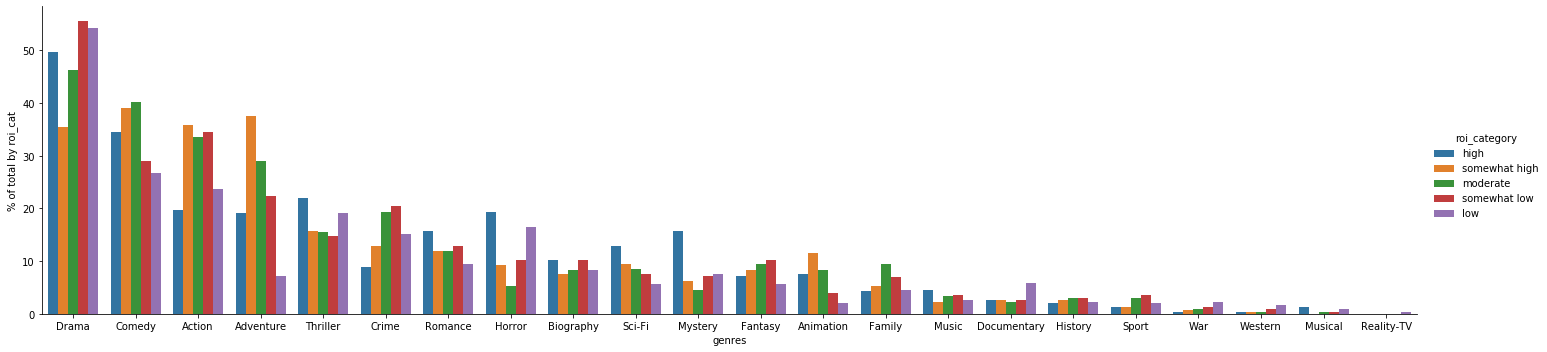

In [106]:
sns.catplot(x='genres', y='% of total by roi_cat', hue='roi_category', data=viz2, kind='bar', aspect=4);

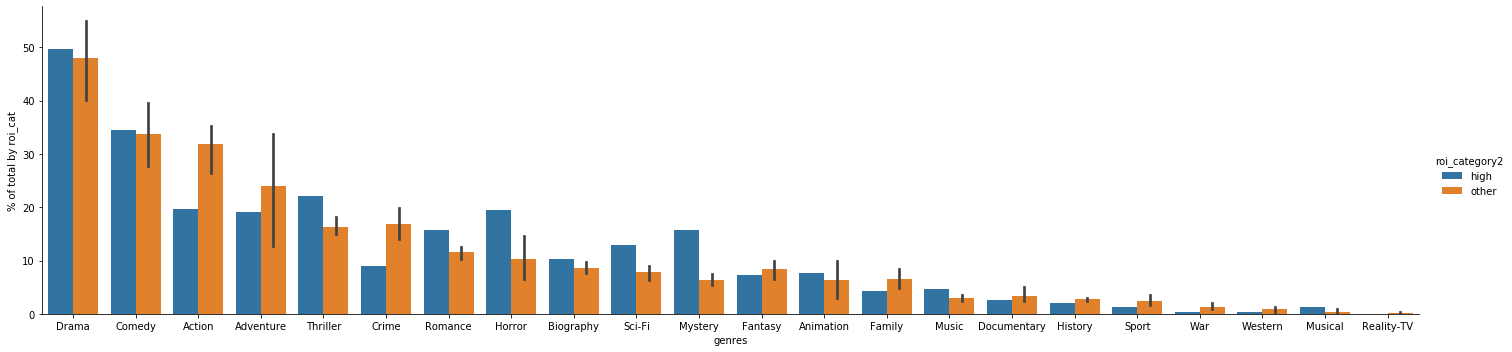

In [116]:
sns.catplot(x='genres', y='% of total by roi_cat', hue='roi_category2', data=viz2, kind='bar', aspect=4);

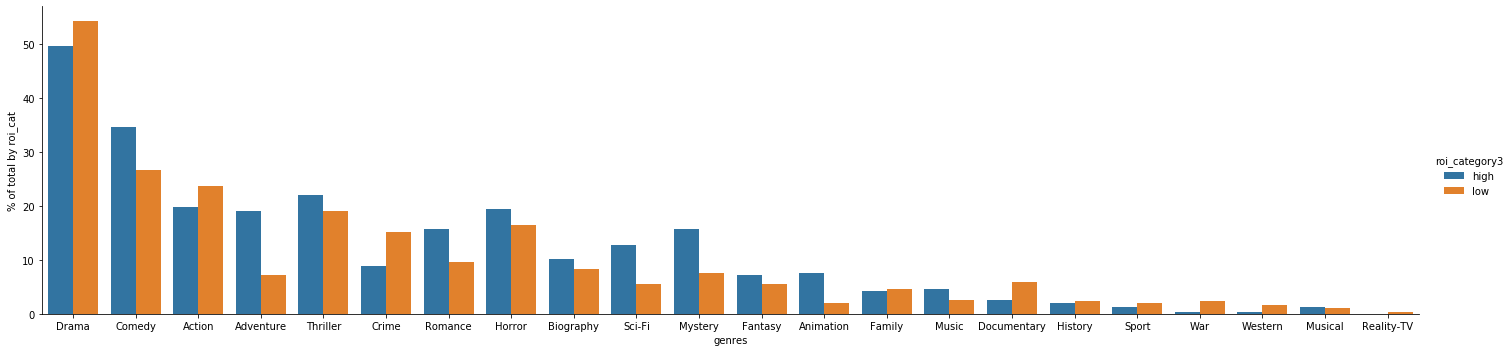

In [112]:
sns.catplot(x='genres', y='% of total by roi_cat', hue='roi_category3', data=viz2, kind='bar', aspect=4);

# Top Genres

In [196]:
viz3a = viz2.loc[viz2.roi_category=='high'].nlargest(10,'% of total by roi_cat')
viz3a.reset_index(inplace=True)
viz3a

,index,roi_category,genres,% of total by roi_cat,r,genreRank,count,roi_category2,roi_category3
0,35,high,Drama,49.671053,0,0,734,high,high
1,20,high,Comedy,34.539474,0,1,515,high,high
2,95,high,Thriller,22.039474,0,4,265,high,high
3,0,high,Action,19.736842,0,2,448,high,high
4,55,high,Horror,19.407895,0,7,184,high,high
5,5,high,Adventure,19.078947,0,3,350,high,high
6,70,high,Mystery,15.789474,0,10,126,high,high
7,80,high,Romance,15.789474,0,6,188,high,high
8,85,high,Sci-Fi,12.828947,0,9,134,high,high
9,15,high,Biography,10.197368,0,8,135,high,high


In [197]:
viz3b = viz2.loc[viz2.roi_category=='low'].nlargest(10,'% of total by roi_cat')
viz3b.reset_index(inplace=True)
viz3b

,index,roi_category,genres,% of total by roi_cat,r,genreRank,count,roi_category2,roi_category3
0,36,low,Drama,54.276316,4,0,734,other,low
1,21,low,Comedy,26.644737,4,1,515,other,low
2,1,low,Action,23.684211,4,2,448,other,low
3,96,low,Thriller,19.078947,4,4,265,other,low
4,56,low,Horror,16.447368,4,7,184,other,low
5,26,low,Crime,15.131579,4,5,233,other,low
6,81,low,Romance,9.539474,4,6,188,other,low
7,16,low,Biography,8.223684,4,8,135,other,low
8,71,low,Mystery,7.565789,4,10,126,other,low
9,6,low,Adventure,7.236842,4,3,350,other,low


In [210]:
viz3 = viz3a.merge(viz3b, left_index=True, right_index=True, suffixes=('_high','_low'))
viz3 = viz3[['genres_high','% of total by roi_cat_high','genres_low','% of total by roi_cat_low']]
viz3

,genres_high,% of total by roi_cat_high,genres_low,% of total by roi_cat_low
0,Drama,49.671053,Drama,54.276316
1,Comedy,34.539474,Comedy,26.644737
2,Thriller,22.039474,Action,23.684211
3,Action,19.736842,Thriller,19.078947
4,Horror,19.407895,Horror,16.447368
5,Adventure,19.078947,Crime,15.131579
6,Mystery,15.789474,Romance,9.539474
7,Romance,15.789474,Biography,8.223684
8,Sci-Fi,12.828947,Mystery,7.565789
9,Biography,10.197368,Adventure,7.236842


# Graveyard

In [176]:
piv3 = pd.DataFrame((pd.pivot_table(fulldata, index=['roi_category'], values =fulldata[[el for el in genreCols]], aggfunc='sum')).stack())
piv3.reset_index(inplace=True)
piv3['r'] = piv3['roi_category'].apply(lambda x: {'high':0, 'somewhat high':1, 'moderate':2, 'somewhat low':3, 'low':4}[x])
piv3.sort_values(by=['r',0], ascending=[True,False], inplace=True)
piv3['roi_category2'] = piv3['roi_category'].apply(lambda x: {'high':'high', 'somewhat high':'other', 'moderate':'other', 'somewhat low':'other', 'low':'other'}[x])
piv3['roi_category3'] = piv3['roi_category'].apply(lambda x: {'high':'high', 'somewhat high':np.nan, 'moderate':np.nan, 'somewhat low':np.nan, 'low':'low'}[x])
piv3.columns=['roi_category', 'genre', 'count', 'r', 'roi_category2', 'roi_category3']
piv3.reset_index(inplace=True)
piv3

,index,roi_category,genre,count,r,roi_category2,roi_category3
0,7,high,Drama,151,0,high,high
1,4,high,Comedy,105,0,high,high
2,19,high,Thriller,67,0,high,high
3,0,high,Action,60,0,high,high
4,11,high,Horror,59,0,high,high
5,1,high,Adventure,58,0,high,high
6,14,high,Mystery,48,0,high,high
7,16,high,Romance,48,0,high,high
8,17,high,Sci-Fi,39,0,high,high
9,3,high,Biography,31,0,high,high


count
roi_category  genre             
high          Action          60
              Adventure       58
              Animation       23
              Biography       31
              Comedy         105
              Crime           27
              Documentary      8
              Drama          151
              Family          13
              Fantasy         22
              History          6
              Horror          59
              Music           14
              Musical          4
              Mystery         48
              Reality-TV       0
              Romance         48
              Sci-Fi          39
              Sport            4
              Thriller        67
              War              1
              Western          1
low           Action          72
              Adventure       22
              Animation        6
              Biography       25
              Comedy          81
              Crime           46
              Documentary     18
              Drama          165
...                          ...
somewhat high Mystery         19
              Reality-TV       0
              Romance         36
              Sci-Fi          29
              Sport            4
              Thriller        48
              War              2
              Western          1
somewhat low  Action         105
              Adventure       68
              Animation       12
              Biography       31
              Comedy          88
              Crime           62
              Documentary      8
              Drama          169
              Family          21
              Fantasy         31
              History          9
              Horror          31
              Music           11
              Musical          1
              Mystery         22
              Reality-TV       0
              Romance         39
              Sci-Fi          23
              Sport           11
              Thriller        45
              War              4
              Western          3

[110 rows x 1 columns]